In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
path = '/kaggle/input/california-housing-prices/housing.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(20640, 10)

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# filter some columns
df = df[[# 'ocean_proximity'
         'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].copy()

In [9]:
df.shape

(20640, 9)

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [11]:
df.isna().sum() # check for null values per column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [12]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [13]:
# remove this - ask gpt if the number still remains the same without scaling it
# df['median_income'] *= 10000

In [14]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## What is the distribution of housing prices in California?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

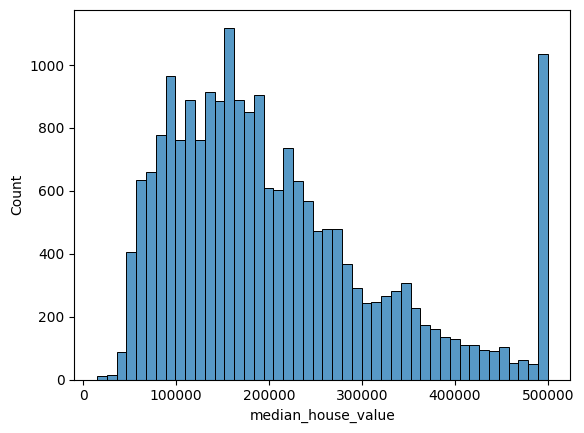

In [15]:
sns.histplot(data=df, x="median_house_value")

## How do housing prices vary by location?

<Axes: xlabel='longitude', ylabel='latitude'>

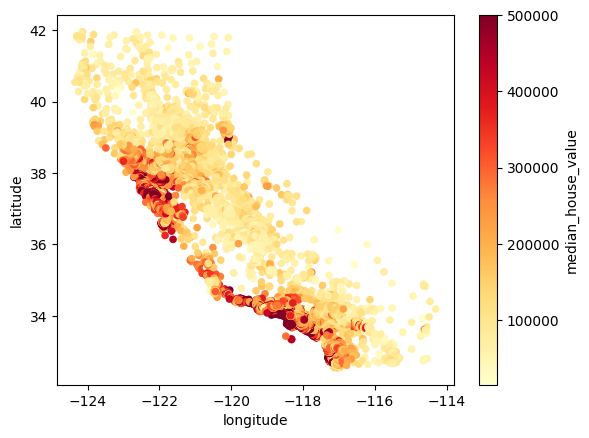

In [16]:
df.plot(x="longitude", y="latitude", kind="scatter", c="median_house_value",
        colormap="YlOrRd")

## How does the median age of houses affect housing prices?

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

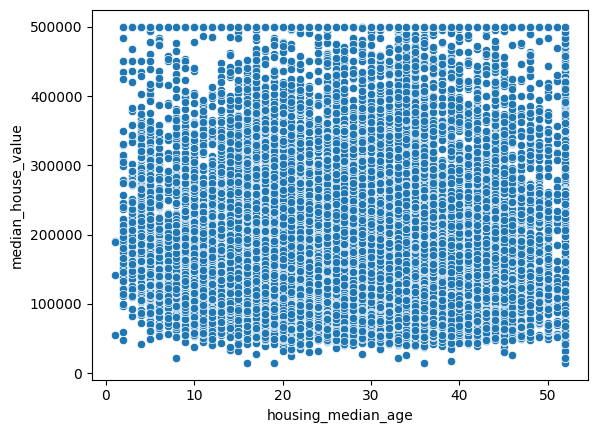

In [17]:
sns.scatterplot(data=df, x="housing_median_age", y="median_house_value")

## Are there any significant outliers in housing prices?

<Axes: xlabel='median_house_value'>

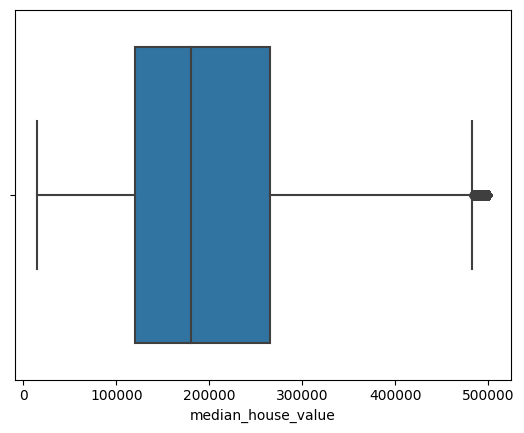

In [18]:
sns.boxplot(data=df, x="median_house_value")

## How does the number of households relate to the median income?

<Axes: xlabel='households', ylabel='median_house_value'>

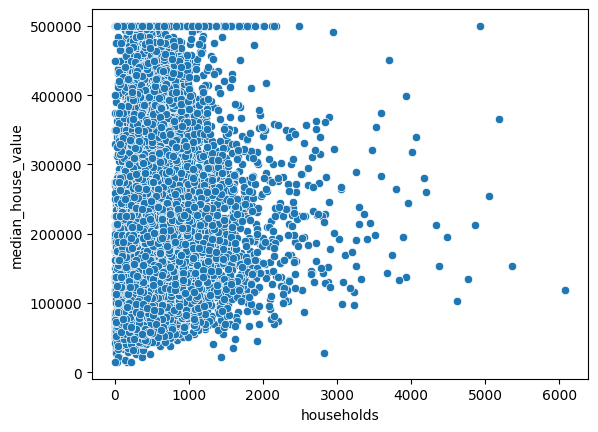

In [19]:
sns.scatterplot(data=df, x="households", y="median_house_value")

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [21]:
import torch.nn as nn
 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [22]:
import torch.nn as nn
import torch.optim as optim
from torchmetrics import MeanAbsolutePercentageError
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
# loss_fn = MeanAbsolutePercentageError()  # MeanAbsolutePercentageError
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [23]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extracts all rows and the first 9 columns (features) from the dataset and assigns them to X.
X = df.iloc[:,0:8]
# Extracts all rows and the 9th column (target variable) from the dataset and assigns it to y.
y = df.iloc[:,8]

# train-test split of the dataset
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert DataFrames to NumPy arrays
X_train_raw = X_train_raw.values
X_test_raw = X_test_raw.values
y_train_raw = y_train_raw.values
y_test_raw = y_test_raw.values

# Standardizing data - The StandardScaler above is fitted on the training set but applied on both the training and test set. 
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train_raw, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test_raw, dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
# batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
epoch_number = []
 
# training loop
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        # take a batch 
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        # forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        # backward pass - Sets gradients of all model parameters to 0 because we want to recalculate them so we can update our parameters.
        optimizer.zero_grad()
        # Computes the gradients of the loss with respect to the model parameters.
        loss.backward()
        # Updates the model parameters using the computed gradients. - new_w = old_w - lr * gradient/derivative
        optimizer.step()
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    epoch_number.append(epoch)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
        
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

In [24]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))

MSE: 4795244032.00
RMSE: 69247.70


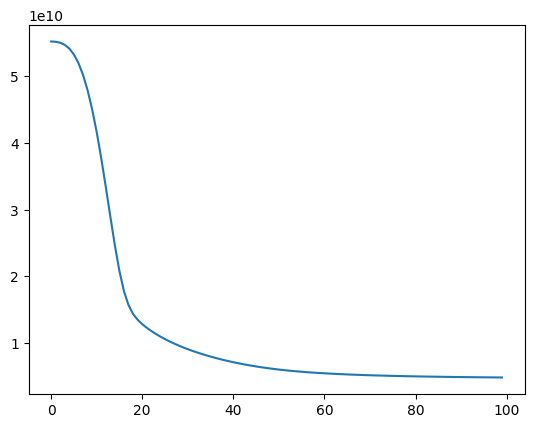

In [25]:
plt.plot(epoch_number, history)
plt.show()

## Evaluate Model

In [26]:
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

[-118.32    34.06    43.    2808.     584.    1654.     569.       4.125] -> [248834.05] (expected [436800.])
[-117.09     32.98     23.     1125.      273.      687.      308.
    2.3182] -> [148742.61] (expected [268800.])
[-1.2037e+02  3.8250e+01  1.3000e+01  4.4950e+03  8.5600e+02  1.1490e+03
  4.5900e+02  2.5352e+00] -> [87220.8] (expected [113700.])
[-1.2239e+02  4.0580e+01  4.4000e+01  1.6250e+03  3.9200e+02  9.4400e+02
  3.4700e+02  1.5972e+00] -> [90137.04] (expected [68900.])
[-119.9    37.49   13.   2230.    443.    920.    361.      3.  ] -> [87630.63] (expected [112000.])


In [27]:
from sklearn.metrics import r2_score
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    print(f"r2_score: {r2_score(y_test, y_pred)}")

r2_score: 0.6311640775639856
